In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import xgboost
from sklearn.metrics import f1_score
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings(action='ignore')

In [75]:
dataset=pd.read_csv('C:/Users/HP-PC/Desktop/file1.csv')

In [76]:
dataset.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,VERIFIED - income source,not verified,Mortgage,Rent,debt_consolidation,credit_card
0,10000001,7000,1,68000.0,18.37,0,0,9,14,0,1,0,1,0,1,0,0
1,10000002,30000,4,63000.0,14.93,0,17,12,24,0,3,0,0,1,0,1,0
2,10000003,24725,7,75566.4,15.88,0,0,12,16,1,3,1,0,1,0,1,0
3,10000004,16000,1,56160.0,14.34,3,0,16,22,1,3,1,0,0,0,1,0
4,10000005,17000,8,96000.0,22.17,1,0,19,30,0,1,1,0,0,0,1,0


In [46]:
x=dataset.drop(['Loan_ID','Interest_Rate'],axis=1)
y=dataset['Interest_Rate']

In [47]:
x_scaled=preprocessing.scale(x)

In [79]:
kfold, scores = KFold(n_splits=5, shuffle=True, random_state=0), list()
for train, test in kfold.split(x.values):
    x_train, x_test = x_scaled[train], x_scaled[test]
    y_train, y_test = y[train], y[test]
    
    num_class1, num_class2, num_class3 = Counter(y_train)[1], Counter(y_train)[2], Counter(y_train)[3]
    sm = SMOTE(random_state=27, sampling_strategy={1: int(2.0*num_class1), 2: int(1.6*num_class2), 3: int(1.6*num_class3)})
    x_train, y_train = sm.fit_resample(x_train, y_train)
    
    model = xgboost.XGBClassifier(random_state=27, max_depth=6, n_estimators=400)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = f1_score(y_test, preds, average="weighted")
    scores.append(score)
    print(score)
print("Average: ", sum(scores)/len(scores))

0.5261096476777185
0.5223072005335331
0.5263142078286059
0.5243816825752745
0.5250920045855777
Average:  0.524840948640142


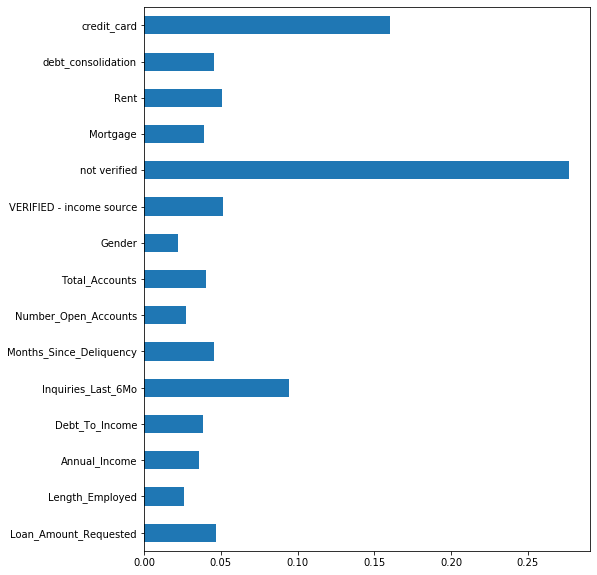

In [82]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.plot(kind='barh', figsize=(8,10))